In [1]:
from adata_hf_datasets.file_utils import download_from_link

# url = "https://datasets.cellxgene.cziscience.com/f886c7d9-1392-4f09-9e10-31b953afa2da.h5ad"
# url = "https://datasets.cellxgene.cziscience.com/bbf12ff4-7f22-4cf5-83cf-9cd37ce4d6f4.h5ad"
# url = "https://allenimmunology.org/public/publication/download/84792154-cdfb-42d0-8e42-39e210e980b4/filesets/3a6afb68-0379-4afa-838a-c0b7f222b517/immune_health_atlas_b-plasma.h5ad"
# url = "https://datasets.cellxgene.cziscience.com/9daa676b-07ec-4cea-80aa-daa49200aa64.h5ad"
# url = "https://medical-epigenomics.org/papers/schaefer2024/data/datasets/human_disease/rnaseq._.samples.h5ad"
url = "https://figshare.com/ndownloader/files/50850783"
save_path = "../data/RNA/raw/test/tabula_sapiens_v2_blood.h5ad"
download_from_link(url, save_path)

../data/RNA/raw/test/tabula_sapiens_v2_blood.h5ad: 1.14GB [04:23, 4.65MB/s]                               


Download complete: ../data/RNA/raw/test/tabula_sapiens_v2_blood.h5ad


True

In [1]:
import anndata

path = (
    "/Users/mengerj/Downloads/Blood_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad"
)
adata = anndata.read_h5ad(path)
adata.obs.keys()

Index(['donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate',
       'library_plate', 'notes', 'cdna_well', 'old_index', 'assay',
       'sample_id', 'replicate', '10X_run', '10X_barcode', 'ambient_removal',
       'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay',
       'cell_ontology_class', 'cell_ontology_id', 'compartment',
       'broad_cell_class', 'free_annotation', 'manually_annotated',
       'published_2022', 'n_genes_by_counts', 'total_counts',
       'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc',
       'pct_counts_ercc', '_scvi_batch', '_scvi_labels',
       'scvi_leiden_donorassay_full', 'age', 'sex', 'ethnicity',
       'scvi_leiden_res05_tissue', 'sample_number'],
      dtype='object')

In [7]:
path = "/Users/mengerj/Downloads/Bone_Marrow_TSP1_30_version2d_10X_smartseq_scvi_Nov122024.h5ad"
adata_2 = anndata.read_h5ad(path)

In [8]:
adata_2.obs["cell_ontology_class"].value_counts()

cell_ontology_class
neutrophil                         8677
cd4-positive, alpha-beta t cell    3173
cd8-positive, alpha-beta t cell    2636
monocyte                           2040
b cell                             1819
hematopoietic precursor cell       1720
plasma cell                        1448
natural killer cell                1099
erythroid progenitor cell           971
hematopoietic stem cell             792
granulocyte                         635
erythrocyte                         453
common myeloid progenitor           453
macrophage                          358
classical monocyte                  231
intermediate monocyte               224
myeloid dendritic cell              108
t cell                               98
mature nk t cell                     64
non-classical monocyte               53
basophil                             23
regulatory t cell                    14
fibroblast                           11
plasmacytoid dendritic cell           9
endothelial cell    

In [6]:
adata2 = anndata.read_zarr(
    "../data/RNA/processed/test/tabula_sapiens_bone_marrow/all/chunk_0.zarr"
)

In [9]:
adata2.var.index

Index(['ENSG00000000003', 'ENSG00000000419', 'ENSG00000000457',
       'ENSG00000000460', 'ENSG00000000938', 'ENSG00000000971',
       'ENSG00000001036', 'ENSG00000001084', 'ENSG00000001167',
       'ENSG00000001460',
       ...
       'ENSG00000290124', 'ENSG00000290125', 'ENSG00000290126',
       'ENSG00000290127', 'ENSG00000290146', 'ENSG00000290149',
       'ENSG00000290163', 'ENSG00000290164', 'ENSG00000290165',
       'ENSG00000290166'],
      dtype='object', name='ensg', length=32131)

In [11]:
adata.var.index

Index(['ENSG00000268903.1', 'ENSG00000241860.6', 'ENSG00000228463.10',
       'ENSG00000237094.12', 'ENSG00000225972.1', 'ENSG00000225630.1',
       'ENSG00000237973.1', 'ENSG00000229344.1', 'ENSG00000248527.1',
       'ENSG00000198744.5',
       ...
       'ENSG00000198840.2', 'ENSG00000212907.2', 'ENSG00000198886.2',
       'ENSG00000210176.1', 'ENSG00000198786.2', 'ENSG00000198695.2',
       'ENSG00000210194.1', 'ENSG00000198727.2', 'ENSG00000210195.2',
       'ENSG00000210196.2'],
      dtype='object', name='ensemblid', length=18713)

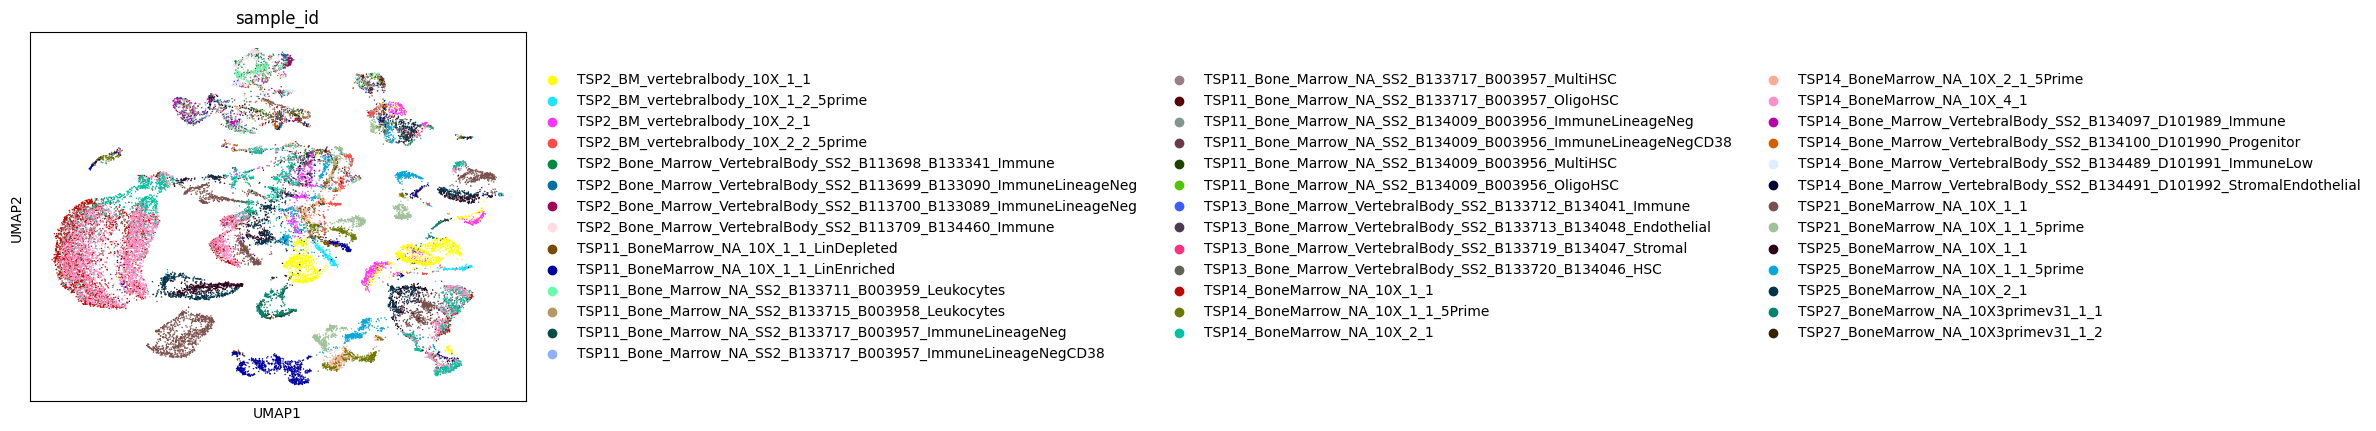

In [15]:
# plot a umap of the embedding
import scanpy as sc

sc.pp.neighbors(adata, n_neighbors=20)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["sample_id"], ncols=1)

In [5]:
# read the file and save a subset of 10k random cells
import scanpy as sc
import numpy as np

adata = sc.read_h5ad(save_path)
adata = adata[np.random.choice(adata.obs.index, 10000, replace=False)]
adata.write_h5ad("../data/RNA/cellxgene_pseudo_bulk_10k.h5ad")